# Loading JSON file
If we have a json file with the results from a Twitter API timeline query:

In [1]:
import json

In [2]:
json_file = "./data/timeline_example.json"

In [3]:
with open(json_file, "r", encoding="utf-8") as f:
    tweets = json.load(f)

# Grab text field from tweets

We will do a little preprocessing on the text at the same time.

If we want each text from a tweet in a list:

In [4]:
list_of_texts = [t["text"].replace("\n", " ").lower() for t in tweets["data"]]

Or for each as a single str, we will add a period of it doesn't contain one:

In [5]:
texts_str = ". ".join(t["text"].replace("\n", " ").lower() for t in tweets["data"])

The return of a Twitter timeline API query might also contain an 'includes' field with its own 'tweets' field. If so, we'll grab that too, though these texts can be from other users:

In [6]:
list_of_other_texts = [
    t["text"].replace("\n", " ").lower() for t in tweets["includes"]["tweets"]
]

In [7]:
other_texts_str = ". ".join(
    t["text"].replace("\n", " ").lower() for t in tweets["includes"]["tweets"]
)

In [8]:
combined_texts = texts_str + " " + other_texts_str

## Removing links

The links frequently found in the text field will not be useful (at least not for a word cloud). Below is a simple regex pattern to find links (I haven't tested this pattern beyond the data here):

In [9]:
import re

In [10]:
def remove_links(text: str) -> str:
    link_pattern = re.compile(r"(https:\S*[^'\. ])")
    matches = link_pattern.findall(text)
    for match in matches:
        text = text.replace(match, "")
    return text

In [11]:
texts_str = remove_links(texts_str)
combined_texts = remove_links(combined_texts)

# Create Spacy Doc

In [13]:
# If import error, run the following in a cell:
# %pip install spacy
import spacy

To download <code>en_core_web_lg</code>, <code>en_core_web_md</code>, or <code>en_core_web_sm</code> into your conda environment enter the following into conda terminal:

<code>spacy download en_core_web_lg</code>

In [14]:
nlp = spacy.load("en_core_web_lg")

In [15]:
user_doc = nlp(texts_str)

In [16]:
combined_doc = nlp(combined_texts)

Length of document:

In [17]:
print(
    f"Length of user_doc: {len(user_doc):,}\nLength of combined doc: {len(combined_doc):,}"
)

Length of user_doc: 2,873
Length of combined doc: 4,981


# Remove stop words and punctuation: 

To just remove stop words:
<pre>
<code>no_stop_words_list = [token for token in doc if not token.is_stop]</code>
</pre>

To just remove punctuation:
<pre>
<code>no_stop_words_list = [token for token in doc if not token.is_punct]</code>
</pre>
The below cell will remove both:

In [18]:
ns_user_doc = [
    token
    for token in user_doc
    if not token.is_stop and not token.is_punct and str(token) != " "
]
ns_comb_doc = [
    token
    for token in combined_doc
    if not token.is_stop and not token.is_punct and str(token) != " "
]

## Length after removing stop words and punctuation:

In [19]:
print(
    f"Length of ns_user_doc: {len(ns_user_doc):,}\nLength of combined ns_comb_doc: {len(ns_comb_doc):,}"
)

Length of ns_user_doc: 1,173
Length of combined ns_comb_doc: 2,041


# Get word count:

In [20]:
from collections import Counter

In [21]:
count_ns_user_doc = Counter(str(token) for token in ns_user_doc)
count_ns_comb_doc = Counter(str(token) for token in ns_comb_doc)

In [22]:
count_ns_user_doc.most_common(10)

[('@alsoacarpenter', 13),
 ('@myantiracism', 12),
 ('@profenlc', 12),
 ('rt', 11),
 ('book', 8),
 ('like', 7),
 ('need', 7),
 ('c', 6),
 ('evidence', 6),
 ('church', 6)]

In [23]:
count_ns_comb_doc.most_common(10)

[('@neilshenvi', 32),
 ('@alsoacarpenter', 25),
 ('@profenlc', 24),
 ('@myantiracism', 20),
 ('crt', 14),
 ('book', 13),
 ('dialogue', 13),
 ('critical', 12),
 ('  ', 11),
 ('like', 11)]

# Generate word cloud

In [24]:
# If this is your first time running this notebook,
# uncomment the following line and run it:
# %pip install wordcloud

In [25]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [26]:
user_wc = WordCloud().generate_from_text(" ".join(str(token) for token in ns_user_doc))
combined_wc = WordCloud().generate_from_text(
    " ".join(str(token) for token in ns_comb_doc)
)

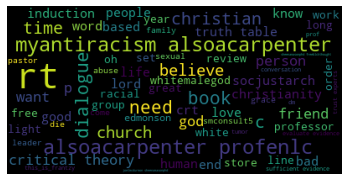

In [27]:
plt.imshow(user_wc)
plt.axis("off")
plt.show()

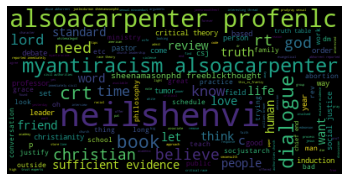

In [28]:
plt.imshow(combined_wc)
plt.axis("off")
plt.show()